In [167]:
#Importing required packages:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [43]:
#Reading the Train and Test Data
wine = pd.read_csv('C:/Users/Shravan RK/Desktop/Matcha Wine Project/training_dataset.csv')
wine_t = pd.read_csv('C:/Users/Shravan RK/Desktop/Matcha Wine Project/test_dataset.csv')

In [44]:
wine.head()

,wine number,acidity type 1,acidity type 2,citric acid,residual sugar,chlorides,sulfur dioxide type 1,sulfur dioxide type 2,pH,sulphates,alcohol,density,color,quality
0,1,5.8,0.13,0.22,12.7,0.058,24.0,183.0,3.32,0.42,11.7,0.99560,W,6
1,2,8.4,0.62,0.12,1.8,0.072,38.0,46.0,3.38,0.89,11.8,0.99504,R,6
2,3,6.6,0.26,0.38,6.5,0.170,68.0,201.0,3.19,0.38,9.4,0.99560,W,6
3,4,6.9,0.32,0.16,1.4,0.051,15.0,96.0,3.22,0.38,9.5,0.99400,W,4
4,5,6.5,0.41,0.64,11.8,0.065,65.0,225.0,3.12,0.51,8.9,0.99780,W,5


In [133]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 14 columns):
wine number              4150 non-null int64
acidity type 1           4150 non-null float64
acidity type 2           4150 non-null float64
citric acid              4150 non-null float64
residual sugar           4150 non-null float64
chlorides                4150 non-null float64
sulfur dioxide type 1    4150 non-null float64
sulfur dioxide type 2    4150 non-null float64
pH                       4150 non-null float64
sulphates                4150 non-null float64
alcohol                  4150 non-null float64
density                  4150 non-null float64
color                    4150 non-null object
quality                  4150 non-null int64
dtypes: float64(11), int64(2), object(1)
memory usage: 454.0+ KB


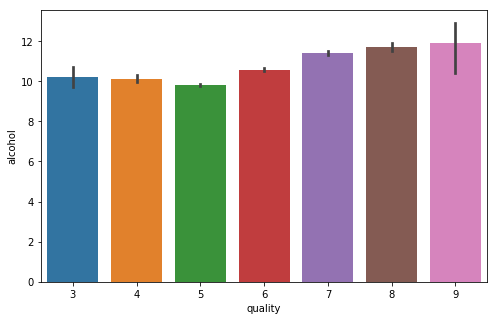

In [11]:
#Alcohol levels go higher with increse in wine quality
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

In [280]:
#Excluding First Column
wine_train = wine.iloc[:,1:]
wine_test = wine_t.iloc[:,1:]

In [144]:
wine_train.head()

,acidity type 1,acidity type 2,citric acid,residual sugar,chlorides,sulfur dioxide type 1,sulfur dioxide type 2,pH,sulphates,alcohol,density,color,quality
0,5.8,0.13,0.22,12.7,0.058,24.0,183.0,3.32,0.42,11.7,0.99560,W,6
1,8.4,0.62,0.12,1.8,0.072,38.0,46.0,3.38,0.89,11.8,0.99504,R,6
2,6.6,0.26,0.38,6.5,0.170,68.0,201.0,3.19,0.38,9.4,0.99560,W,6
3,6.9,0.32,0.16,1.4,0.051,15.0,96.0,3.22,0.38,9.5,0.99400,W,4
4,6.5,0.41,0.64,11.8,0.065,65.0,225.0,3.12,0.51,8.9,0.99780,W,5


In [145]:
#Separating the dataset as response variable and feature variabes
X_qual = wine_train.drop(['quality', 'color', 'density'], axis = 1)
y_qual = wine_train['quality']

In [147]:
#Train and Validation splitting of data 
X_qtrain, X_qval, y_qtrain, y_qval = train_test_split(X_qual, y_qual, test_size = 0.25, random_state = 10)

In [148]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()
X_qtrain = sc.fit_transform(X_qtrain)
X_qval = sc.fit_transform(X_qval)

In [149]:
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_qtrain, y_qtrain)
pred_rfr = rfr.predict(X_qval)

In [156]:
#Rounding off the floting point values
pred_rfr = np.round(pred_rfr)

In [152]:
#Validation Metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_qval, pred_rfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_qval, pred_rfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_qval, pred_rfr)))

Mean Absolute Error: 0.4344894026974952
Mean Squared Error: 0.5115606936416185
Root Mean Squared Error: 0.7152347122739628


In [265]:
#Prediction of Test Quality
X_test = sc.fit_transform(wine_test)
pred_qual = rfr.predict(X_test)
pred_qual = np.round(pred_qual)

In [165]:
print(list(pred_qual))

[6.0, 5.0, 6.0, 6.0, 5.0, 6.0, 6.0, 7.0, 6.0, 7.0, 6.0, 5.0, 6.0, 6.0, 6.0, 5.0, 5.0, 6.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 5.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 7.0, 5.0, 6.0, 5.0, 6.0, 6.0, 5.0, 6.0, 6.0, 7.0, 6.0, 5.0, 7.0, 6.0, 7.0, 6.0, 6.0, 6.0, 5.0, 7.0, 6.0, 5.0, 6.0, 5.0, 6.0, 6.0, 6.0, 5.0, 5.0, 7.0, 7.0, 5.0, 5.0, 5.0, 7.0, 6.0, 6.0, 6.0, 5.0, 7.0, 5.0, 6.0, 6.0, 6.0, 5.0, 5.0, 6.0, 5.0, 7.0, 5.0, 6.0, 6.0, 5.0, 5.0, 6.0, 7.0, 7.0, 5.0, 6.0, 5.0, 6.0, 6.0, 6.0, 7.0, 6.0, 5.0, 6.0, 5.0, 5.0, 7.0, 5.0, 6.0, 5.0, 6.0, 6.0, 7.0, 6.0, 6.0, 5.0, 6.0, 5.0, 6.0, 6.0, 6.0, 7.0, 6.0, 5.0, 6.0, 6.0, 5.0, 6.0, 5.0, 6.0, 5.0, 7.0, 5.0, 5.0, 5.0, 6.0, 7.0, 6.0, 6.0, 6.0, 7.0, 5.0, 5.0, 6.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 5.0, 7.0, 6.0, 5.0, 5.0, 6.0, 5.0, 6.0, 6.0, 6.0, 5.0, 6.0, 6.0, 6.0, 5.0, 6.0, 7.0, 7.0, 6.0, 5.0, 6.0, 5.0, 6.0, 7.0, 5.0, 5.0, 5.0, 7.0, 6.0, 6.0, 7.0, 6.0, 6.0, 5.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0,

In [170]:
prediction = pd.DataFrame(pred_qual, columns=['quality']).to_csv('quality.csv')

In [173]:
#Wine Color Prediciton
wine_train['color'] = LabelEncoder().fit_transform(wine['color'])

In [174]:
wine_train.head()

,acidity type 1,acidity type 2,citric acid,residual sugar,chlorides,sulfur dioxide type 1,sulfur dioxide type 2,pH,sulphates,alcohol,density,color,quality
0,5.8,0.13,0.22,12.7,0.058,24.0,183.0,3.32,0.42,11.7,0.99560,1,6
1,8.4,0.62,0.12,1.8,0.072,38.0,46.0,3.38,0.89,11.8,0.99504,0,6
2,6.6,0.26,0.38,6.5,0.170,68.0,201.0,3.19,0.38,9.4,0.99560,1,6
3,6.9,0.32,0.16,1.4,0.051,15.0,96.0,3.22,0.38,9.5,0.99400,1,4
4,6.5,0.41,0.64,11.8,0.065,65.0,225.0,3.12,0.51,8.9,0.99780,1,5


In [175]:
#Now seperate the dataset as response variable and feature variabes
X_col = wine_train.drop(['quality', 'color', 'density'], axis = 1)
y_col = wine_train['color']

In [176]:
#Train and Validation splitting of data 
X_ctrain, X_cval, y_ctrain, y_cval = train_test_split(X_col, y_col, test_size = 0.25, random_state = 10)

In [177]:
#Applying Standard scaling to get optimized result
X_ctrain = sc.fit_transform(X_ctrain)
X_cval = sc.fit_transform(X_cval)

In [178]:
#Random Forrest Classifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_ctrain, y_ctrain)
pred_rfc = rfc.predict(X_cval)

In [182]:
#Let's see how our model performed
print(classification_report(y_cval, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       271
           1       0.99      1.00      0.99       767

   micro avg       0.99      0.99      0.99      1038
   macro avg       0.99      0.99      0.99      1038
weighted avg       0.99      0.99      0.99      1038



In [252]:
#Prediction of Test Color
X_test = sc.fit_transform(wine_test)
pred_col = rfc.predict(X_test)
pred_col = np.round(pred_col)

In [253]:
#Convertig to appropriate class
pred_col = ['W' if i ==1 else 'R' for i in pred_col]

In [254]:
list(pred_col)

['W',
 'R',
 'R',
 'W',
 'R',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'R',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'R',
 'R',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'R',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'R',
 'W',
 'W',
 'W',
 'W',
 'R',
 'W',
 'W',
 'R',
 'W',
 'W',
 'W',
 'W',
 'R',
 'R',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'R',
 'W',
 'R',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'R',
 'W',
 'W',
 'R',
 'W',
 'W',
 'W',
 'W',
 'W',
 'R',
 'R',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'R',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'R',
 'R',
 'W',
 'W',
 'W',
 'W',
 'R',
 'W',
 'W',
 'W',
 'R',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'R',
 'W',
 'W',
 'W',
 'R',
 'W',
 'R',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'R',
 'W',
 'R',
 'R',
 'W',
 'R',
 'W',
 'W',
 'W',
 'W',
 'R',
 'R',
 'W',
 'R',
 'W',
 'W',
 'W',
 'W',
 'R',
 'W',
 'R',
 'W',
 'W',
 'R'

In [255]:
prediction = pd.DataFrame(pred_col, columns=['color']).to_csv('color.csv')

In [256]:
#Wine Density Prediciton
wine_train.head()

,acidity type 1,acidity type 2,citric acid,residual sugar,chlorides,sulfur dioxide type 1,sulfur dioxide type 2,pH,sulphates,alcohol,density,color,quality
0,5.8,0.13,0.22,12.7,0.058,24.0,183.0,3.32,0.42,11.7,0.99560,1,6
1,8.4,0.62,0.12,1.8,0.072,38.0,46.0,3.38,0.89,11.8,0.99504,0,6
2,6.6,0.26,0.38,6.5,0.170,68.0,201.0,3.19,0.38,9.4,0.99560,1,6
3,6.9,0.32,0.16,1.4,0.051,15.0,96.0,3.22,0.38,9.5,0.99400,1,4
4,6.5,0.41,0.64,11.8,0.065,65.0,225.0,3.12,0.51,8.9,0.99780,1,5


In [258]:
#Separating the dataset as response variable and feature variabes
X_den = wine_train.drop(['quality', 'color', 'density'], axis = 1)
y_den = wine_train['density']

In [259]:
#Train and Validation splitting of data 
X_dtrain, X_dval, y_dtrain, y_dval = train_test_split(X_den, y_den, test_size = 0.25, random_state = 10)

In [260]:
#Applying Standard scaling to get optimized result
X_dtrain = sc.fit_transform(X_dtrain)
X_dval = sc.fit_transform(X_dval)

In [261]:
#Random Forrest Regressor
rfr2 = RandomForestRegressor(n_estimators=200)
rfr2.fit(X_dtrain, y_dtrain)
pred_rfr2 = rfr2.predict(X_dval)

In [269]:
#Validation Metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_dval, np.round(pred_rfr2, decimals=4)))
print('Mean Squared Error:', metrics.mean_squared_error(y_dval, np.round(pred_rfr2, decimals=4)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_dval, np.round(pred_rfr2, decimals=4))))

Mean Absolute Error: 0.00045100674373796054
Mean Squared Error: 4.00496026011562e-07
Root Mean Squared Error: 0.0006328475535320983


In [270]:
#Prediction of Test Density
X_test = sc.fit_transform(wine_test)
pred_den = rfr2.predict(X_test)
pred_den = np.round(pred_den, decimals=4)

In [271]:
prediction = pd.DataFrame(pred_den, columns=['density']).to_csv('density.csv')

In [283]:
wine_t.head()

,wine number,acidity type 1,acidity type 2,citric acid,residual sugar,chlorides,sulfur dioxide type 1,sulfur dioxide type 2,pH,sulphates,alcohol
0,4151,7.6,0.25,0.34,1.3,0.056,34.0,176.0,3.10,0.51,9.5
1,4152,6.1,0.60,0.12,1.8,0.050,11.0,76.0,3.42,0.48,10.4
2,4153,13.0,0.32,0.65,2.6,0.093,15.0,47.0,3.05,0.61,10.6
3,4154,6.6,0.28,0.30,12.9,0.033,31.0,177.0,3.12,0.39,11.2
4,4155,6.6,0.44,0.15,2.1,0.076,22.0,53.0,3.32,0.62,9.3


In [291]:
#A new dictionary with all predicted attributes and Wine number
df1 = {
    'Wine Number': wine_t['wine number'],
    'density':pred_den,
   'color': pred_col,
    'quality' : pred_qual}

In [297]:
prediction_final = pd.DataFrame(df1).to_csv('answer.csv', index = False)